## <p style="text-align: center;">MIS 285N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Problem Set 3: Machine Learning Experiments</p>
## <p style="text-align: center;">Total points: 10</p>
## <p style="text-align: center;">Due: Friday, 30th September submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

In this Problem Set we will solve the Unsupervised problem using k-means clustering algorithm. 

## Task 1
Read the wine data from the link provided below. 
Split the wine data into X and y. The X should have the features associated with each class of wine. The y should indicate the type of wine. 

Peform PCA and extract the top two components. 

Generate a scatter plot for the 2 components generated by PCA. Do they appear to be in  clusters of 3? 

The referece plot is given below. 

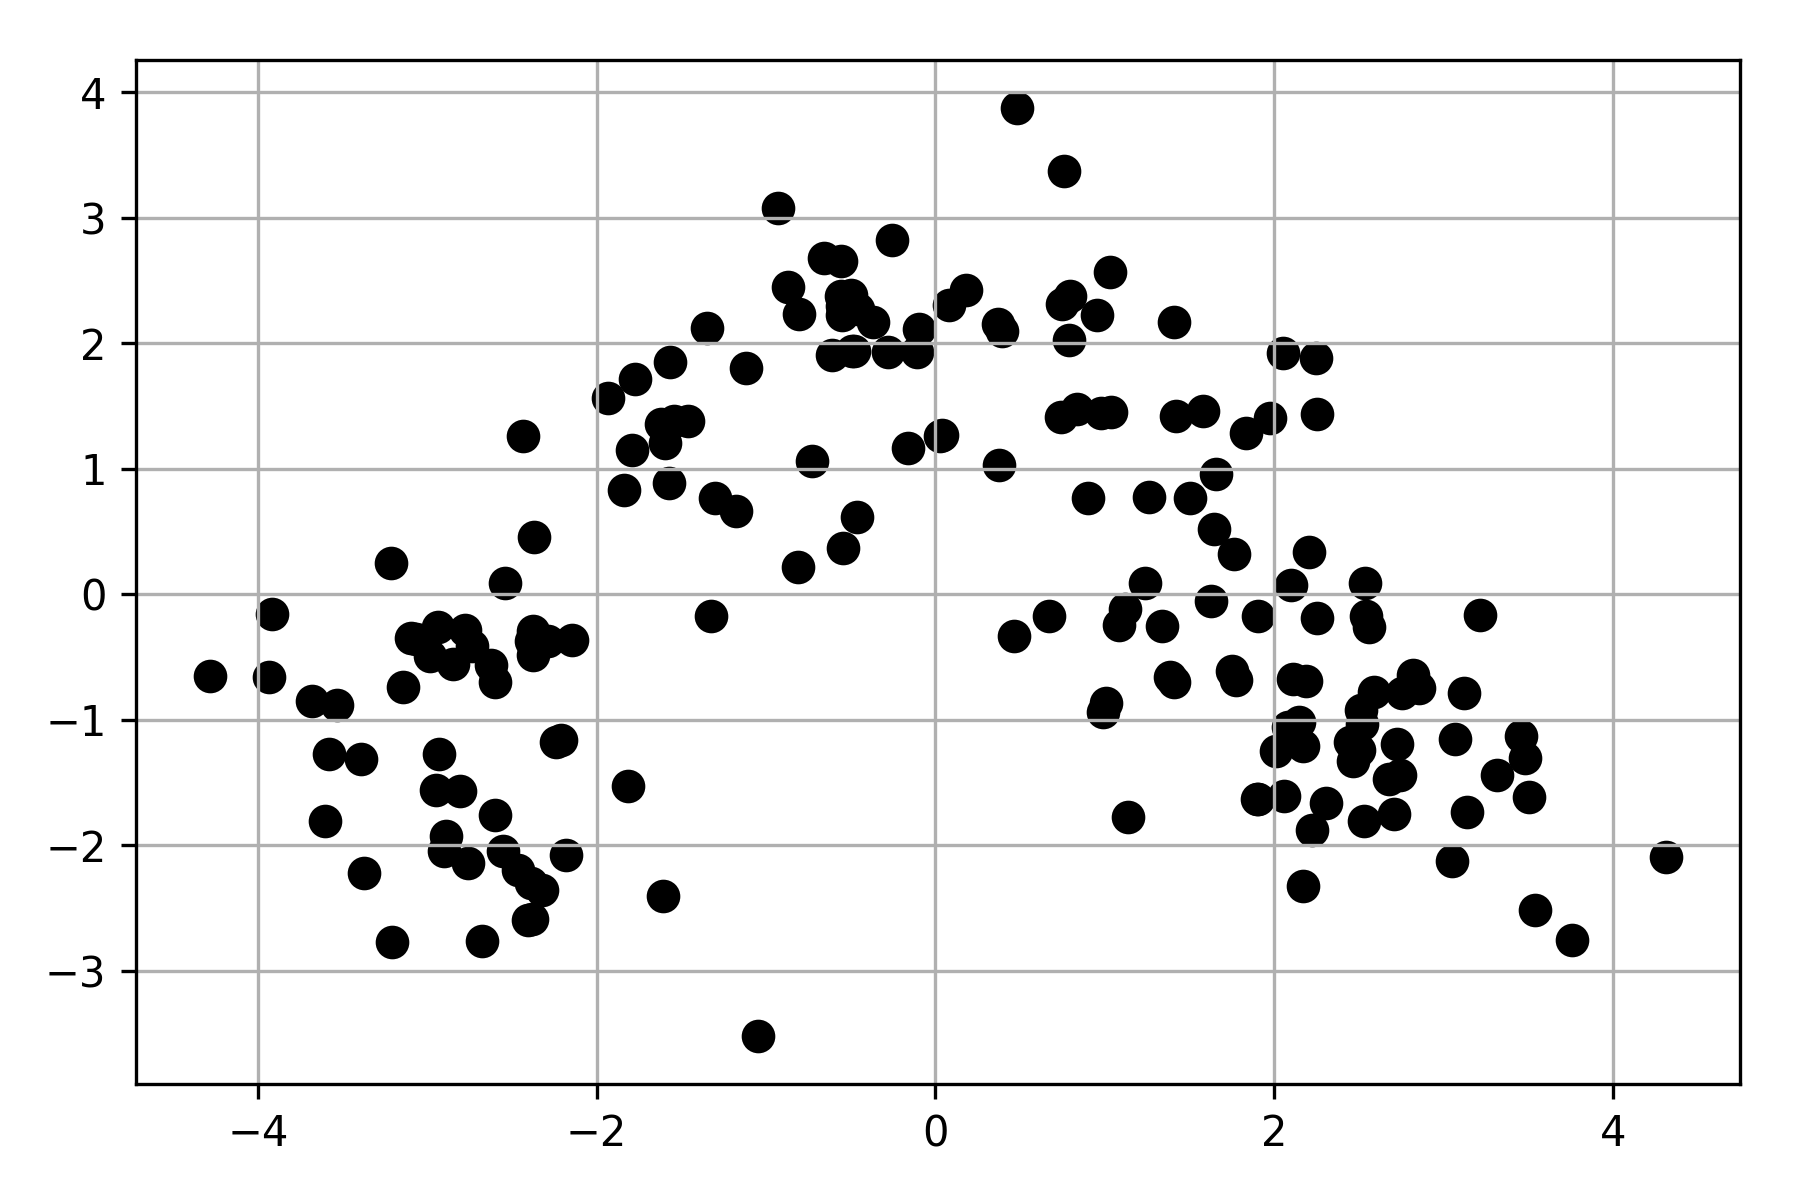

In [1]:
from IPython.display import Image
Image(filename=r'Blobs.png')

## Task 2
Run a k-means clustering model for the input data. This should generate the cluster centoids. Perform this for a value of k=3 and plot the cluster centroid vs. data points in that cluster as a scatter plot. 

To check how well k-means performed, print the prediction accuracy and plot the confusion matrix. 
It is not straightforward to print the accuracy score. Makesure to match the predicted wine class to the original wine class and then print the accuracy. 

Reference plot is given below: 

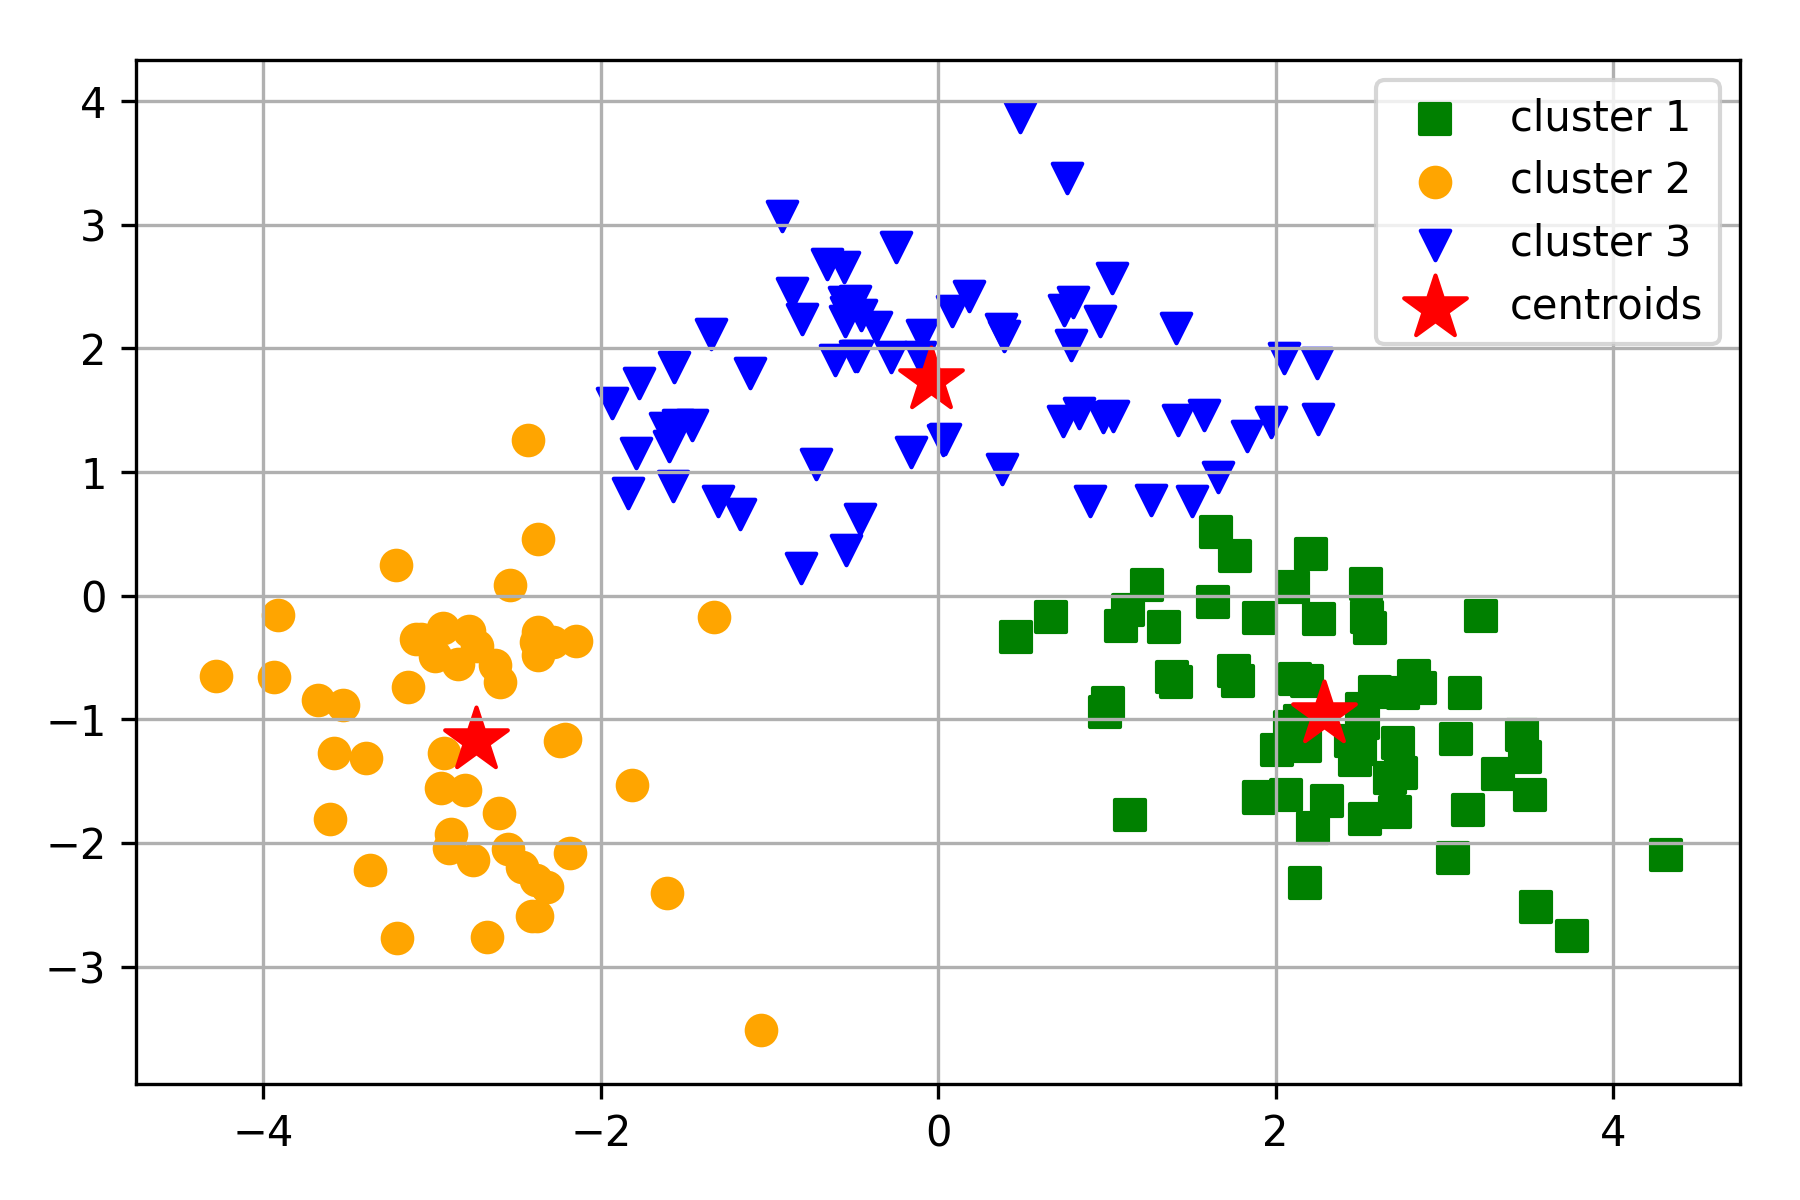

In [2]:
Image(filename=r'centroids.png')

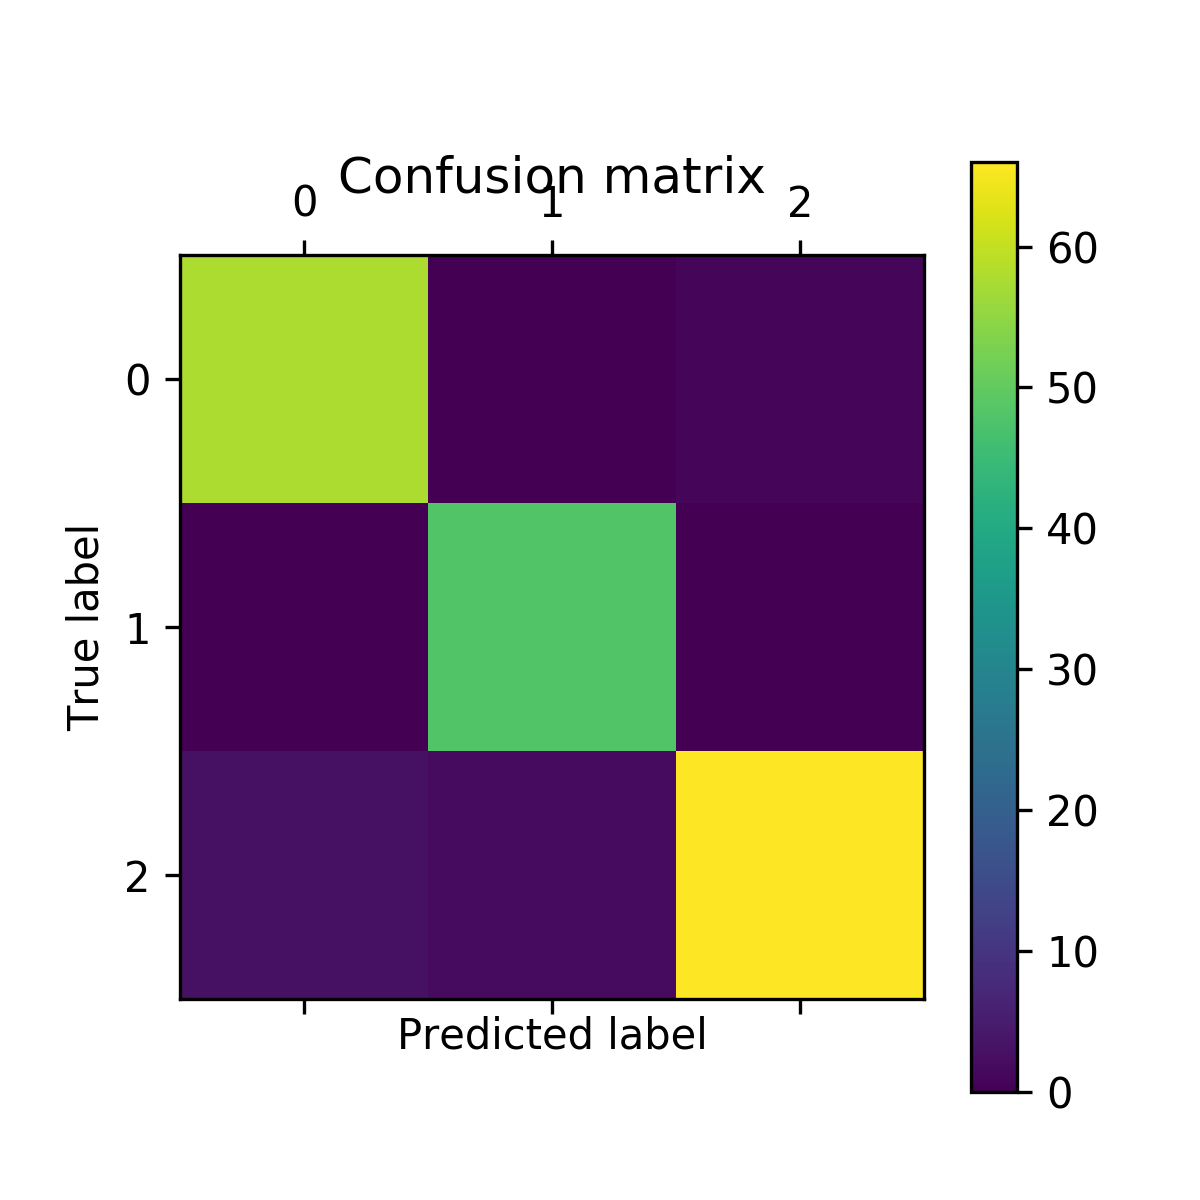

In [3]:
Image(filename=r'confusion.png')

## Task 3

Run the KMeans model for different values of $k$ and plot the distortions in each case and identify the elbow of the curve for PCA'ed dataset with n=2 components. 

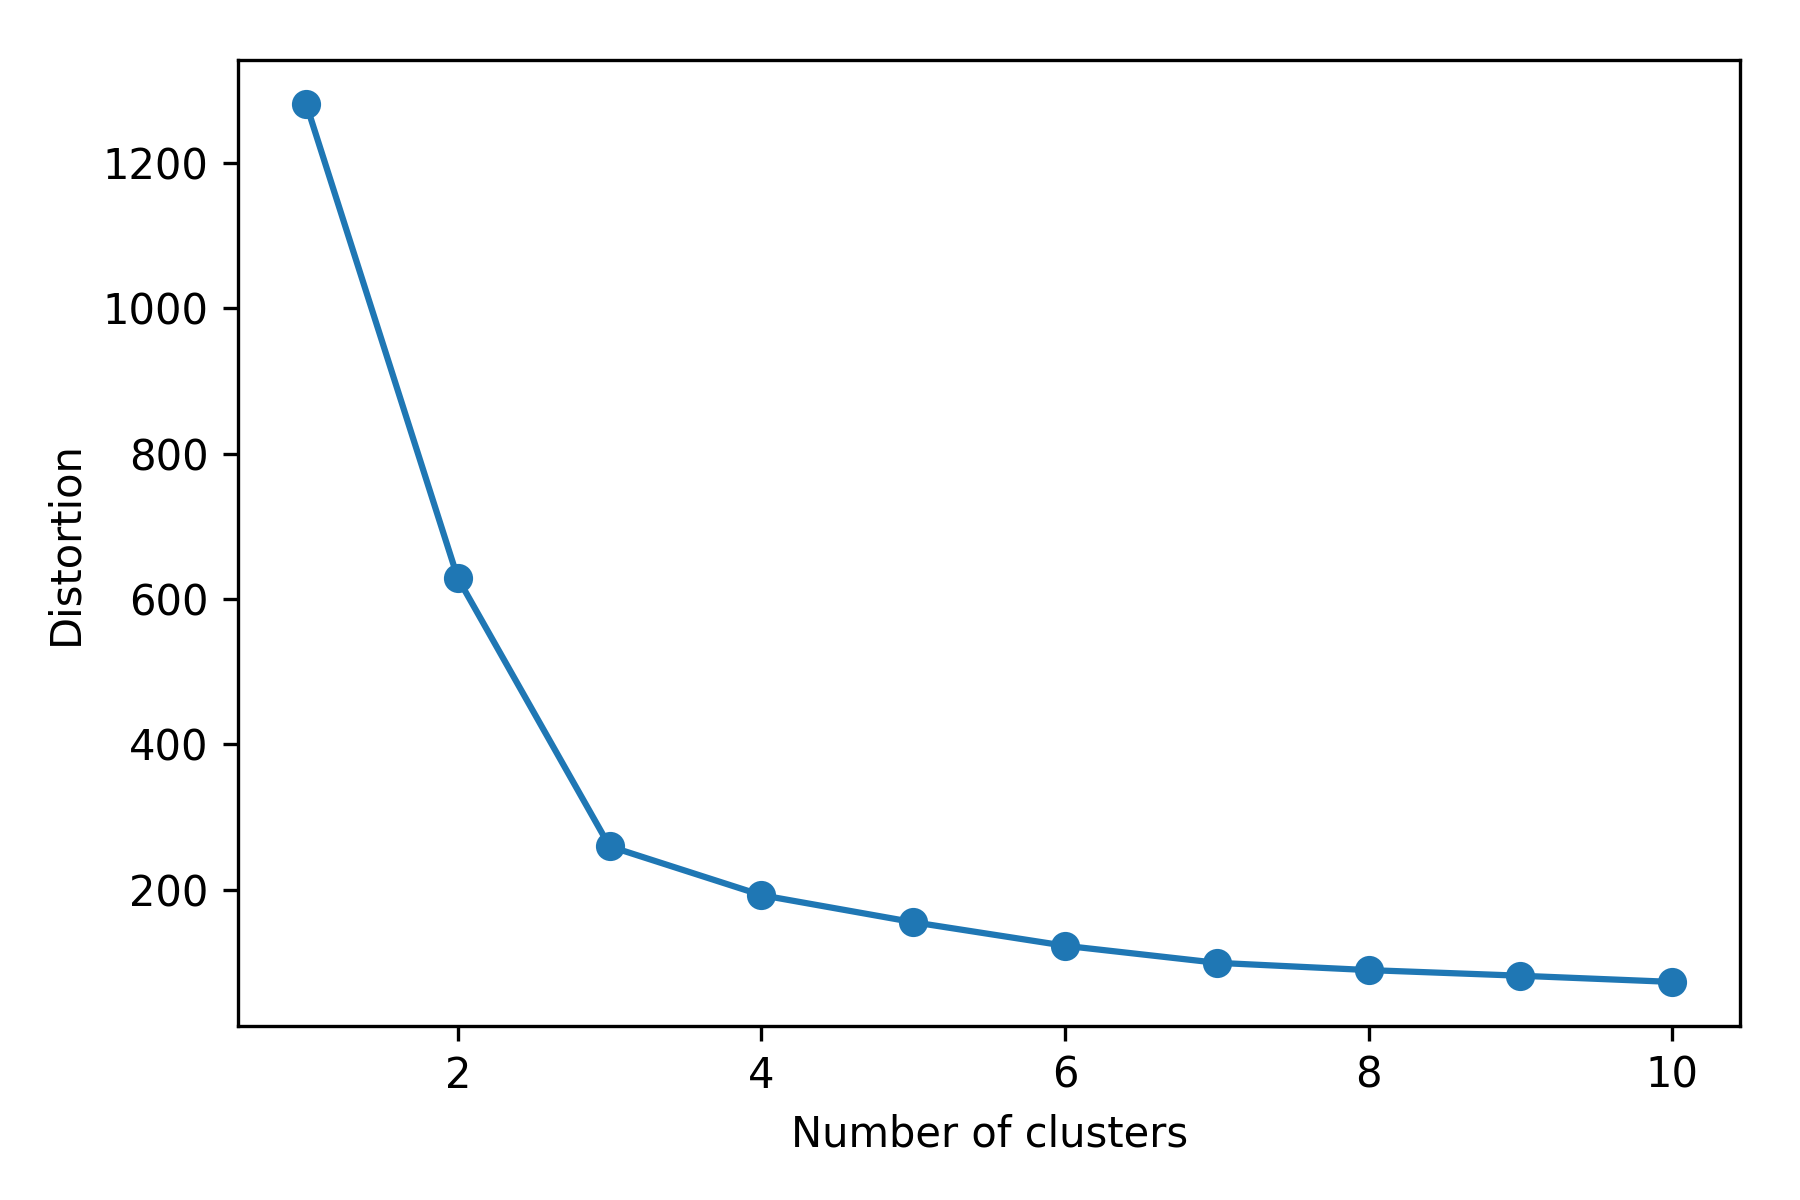

In [4]:
Image(filename=r'elbow.png')

## Solution

## Peform PCA and extract the top two components. Generate a scatter plot for the 2 components generated by PCA

In [5]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [6]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)
# give column names to all classes
df_wine.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
display(df_wine)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
# data preprocessing
df_wine['Class'] = df_wine['Class'].replace([1,2,3],[0,1,2])

# split datset into train_test_split
X = df_wine.iloc[:,1:].values
y = df_wine.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
# standard scaling on training set
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
# performing PCA where components=2
pca = PCA(n_components =2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

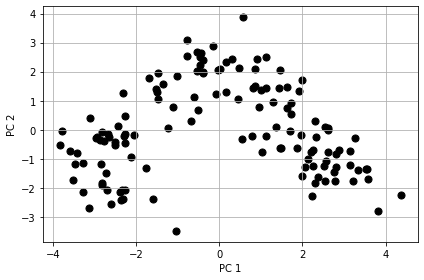

In [14]:
# plot the training set
plt.scatter(X_train_pca[:,0],X_train_pca[:,1], c='Black', marker = 'o', s=50)
plt.grid()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()
plt.show()

In [15]:
# Perform k-means with clusters=3
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_km = km.fit_predict(X_train_pca)

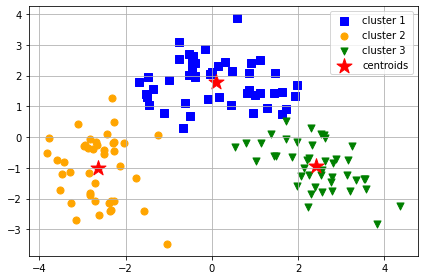

labels [2 1 0 1 2 1 1 2 1 2 0 1 1 0 1 1 2 1 1 0 1 1 0 2 0 2 0 2 2 0 2 1 1 0 0 0 1
 1 2 1 0 0 0 0 0 2 2 0 2 1 2 1 2 2 0 2 0 0 2 1 0 2 0 0 0 1 2 1 1 2 2 0 1 2
 2 0 0 2 2 2 1 0 2 0 1 2 0 1 1 2 0 1 2 1 0 2 2 0 2 1 0 1 2 1 1 1 2 0 0 0 0
 1 1 0 0 2 0 1 1 2 2 1 0 0 0 2 2 2 0 0 0 2 1]
truth [0 2 1 2 0 2 2 0 2 0 1 2 2 1 2 2 0 1 2 1 1 2 1 0 1 1 1 0 0 1 1 2 2 1 1 1 2
 2 0 2 1 1 1 1 1 0 0 1 0 2 0 2 0 0 1 0 1 1 0 2 1 0 1 1 1 2 0 2 2 0 0 1 2 0
 0 1 1 0 0 0 2 1 0 1 2 0 1 2 2 0 0 2 0 2 1 0 0 1 0 2 1 2 0 2 2 2 0 1 1 1 1
 2 2 1 1 0 1 2 2 0 0 2 1 1 1 0 0 0 1 1 1 0 2]
lables: [0, 2, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2]


In [17]:
# Plot scatter plots
plt.scatter(X_train_pca[y_km == 0, 0],
            X_train_pca[y_km == 0, 1],
            s=50,
            c='blue',
            marker='s',
            label='cluster 1')
plt.scatter(X_train_pca[y_km == 1, 0],
            X_train_pca[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(X_train_pca[y_km == 2, 0],
            X_train_pca[y_km == 2, 1],
            s=50,
            c='green',
            marker='v',
            label='cluster 3')
centers = km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], c='red', s=250, marker = '*', label= 'centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('centroids.png', dpi=300)
plt.show()

print("labels",km.labels_[:])
print("truth",y_train)
actual_label_list=[]
for label in km.labels_[:]:
    if label==0:
        actual_label=1
    elif label==1:
        actual_label=2
    else:
        actual_label=0
    actual_label_list.append(actual_label)
print("lables:",actual_label_list)

In [18]:
# To increase model accuracy post processing is done as we identify that the model is predicting label  0 to 1 and vice versa
mapping_dict = { 0: 1, 1: 2, 2:0}
mapped_predictions = [ mapping_dict[x] for x in km.predict(X_test_pca)]

In [19]:
# Accuracy 
from sklearn.metrics import classification_report
print("Acc", accuracy_score(y_train, actual_label_list))

Acc 0.9624060150375939


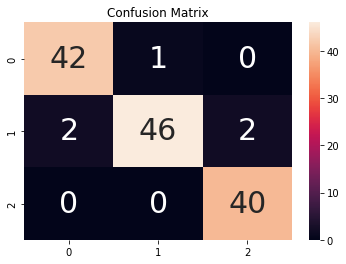

In [20]:
# Plot the confusion matrix
y_pred = km.predict(X_test_pca)
cm = confusion_matrix(y_train, actual_label_list)
# confusion matrix sns heatmap 
ax = plt.axes()
sns.heatmap(cm, annot=True, annot_kws={"size": 30}, fmt='d', ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

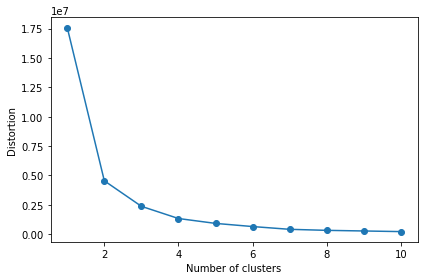

In [21]:
# Plot the elbow curve
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.savefig('elbow.png', dpi=300)
plt.show()